In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print(x_data.shape, t_data.shape)

except Exception as err:

    print(str(err))

(759, 8) (759, 1)


In [3]:
TEST_SPLIT_RATIO = 0.1

test_nums = int(TEST_SPLIT_RATIO*len(x_data))

print('test_nums = ', test_nums)

x_test = x_data[:test_nums]
t_test = t_data[:test_nums]

x_data = x_data[test_nums:]
t_data = t_data[test_nums:]

print(x_data.shape, t_data.shape)
print(x_test.shape, t_test.shape)

test_nums =  75
(684, 8) (684, 1)
(75, 8) (75, 1)


In [4]:
VAL_SPLIT_RATIO = 0.1

val_nums = int(VAL_SPLIT_RATIO*len(x_data))

print('val_nums = ', val_nums)

x_val = x_data[:val_nums]
t_val = t_data[:val_nums]

x_data = x_data[val_nums:]
t_data = t_data[val_nums:]

print(x_data.shape, t_data.shape)
print(x_val.shape, t_val.shape)

val_nums =  68
(616, 8) (616, 1)
(68, 8) (68, 1)


In [5]:
# Logistic Regression 을 keras 이용하여 생성

model = Sequential()

# 노드 1개인 출력층 생성
model.add(Dense(t_data.shape[1], 
                input_shape=(x_data.shape[1],),
                activation='sigmoid'))  

In [6]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=500, validation_data=(x_val, t_val), verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
20/20 - 3s - loss: 0.7003 - accuracy: 0.5909 - val_loss: 0.6842 - val_accuracy: 0.6618 - 3s/epoch - 149ms/step
Epoch 2/500
20/20 - 0s - loss: 0.6942 - accuracy: 0.6071 - val_loss: 0.6767 - val_accuracy: 0.6618 - 100ms/epoch - 5ms/step
Epoch 3/500
20/20 - 0s - loss: 0.6892 - accuracy: 0.6136 - val_loss: 0.6705 - val_accuracy: 0.7059 - 98ms/epoch - 5ms/step
Epoch 4/500
20/20 - 0s - loss: 0.6848 - accuracy: 0.6250 - val_loss: 0.6645 - val_accuracy: 0.7059 - 86ms/epoch - 4ms/step
Epoch 5/500
20/20 - 0s - loss: 0.6807 - accuracy: 0.6364 - val_loss: 0.6598 - val_accuracy: 0.7059 - 85ms/epoch - 4ms/step
Epoch 6/500
20/20 - 0s - loss: 0.6773 - accuracy: 0.6396 - val_loss: 0.6551 - val_accuracy: 0.7059 - 95ms/epoch - 5ms/step
Epoch 7/500
20/20 - 0s - loss: 0.6740 - accuracy: 0.6445 - val_loss: 0.6511 - val_accuracy: 0.6912 - 87ms/epoch - 4ms/step
Epoch 8/500
20/20 - 0s - loss: 0.6711 - accuracy: 0.6380 - val_loss: 0.6473 - val_accuracy: 0.6912 - 101ms/epoch - 5ms/step
Epoch 9/500
20

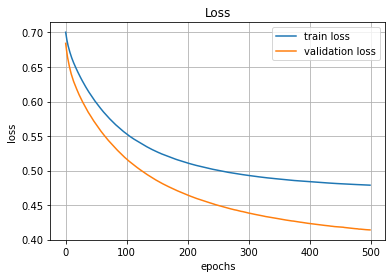

In [8]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

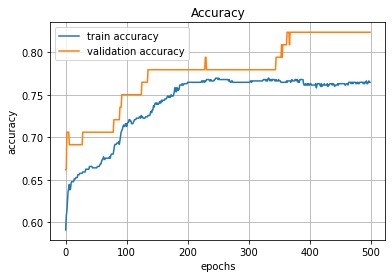

In [9]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [10]:
model.evaluate(x_test, t_test)

3/3 [==============================] - 0s 9ms/step - loss: 0.5611 - accuracy: 0.6933


[0.5610601902008057, 0.6933333277702332]